# CSE 3683 In-class Exercise: Neural Networks in PyTorch

In this assignment, we will implement a deep learning pipeline in PyTorch to perform image classification. The deep learning pipeline will involve data loading, neural network architecture design, loss function design, optimization, training, and evaluation.

The dataset for this assignment is taken from [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist). It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

The neural network architecture is a simple network with 3 linear layers and Rectified Linear Units (ReLU) as activation functions.

This exercise is a modified version of the official PyTorch tutorial, which can be found here:
[link](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html).


Tensors in PyTorch
---

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators.

In [1]:
import torch
import numpy as np

Tensors can be initialized directly from constant values. The data type is automatically inferred.

In [2]:
data = [[1, 2],[3, 4]]
x1 = torch.tensor(data)
print(x1)

tensor([[1, 2],
        [3, 4]])


Tensors can also be created from a NumPy array

In [3]:
np_array = np.array([[3,4], [5,6]])
x2 = torch.from_numpy(np_array)
print(x2)

tensor([[3, 4],
        [5, 6]])


Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [4]:
print(f"Shape of tensor: {x1.shape}")
print(f"Datatype of tensor: {x1.dtype}")
print(f"Device tensor is stored on: {x1.device}")

Shape of tensor: torch.Size([2, 2])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


PyTorch supports a wide variety of tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), and sampling.

In [5]:
print("Addition:")
print(x1 + x2)

print("Element-wise multiplication")
print(x1 * x2)

print("Matrix multiplication")
print(x1.matmul(x2))

Addition:
tensor([[ 4,  6],
        [ 8, 10]])
Element-wise multiplication
tensor([[ 3,  8],
        [15, 24]])
Matrix multiplication
tensor([[13, 16],
        [29, 36]])


PyTorch operations can be run on either the CPU or an accelerator such as CUDA, MPS, MTIA, or XPU. By default, tensors are created on the CPU. We can create tensors on a GPU accelerator by specifying the device or explicitly moving tensors to the accelerator using .to() method.

In [6]:
# check if CUDA acceleration is available
print(torch.cuda.is_available())

True


In [7]:
print(x1)
print(f"Device tensor is stored on: {x1.device}")
x2 = x1.to("cuda")
print(x2)
print(f"Device tensor is stored on: {x2.device}")
x3 = x2.to("cpu")
print(x2)
print(f"Device tensor is stored on: {x3.device}")

tensor([[1, 2],
        [3, 4]])
Device tensor is stored on: cpu
tensor([[1, 2],
        [3, 4]], device='cuda:0')
Device tensor is stored on: cuda:0
tensor([[1, 2],
        [3, 4]], device='cuda:0')
Device tensor is stored on: cpu


GPU acceleration can result in a large speedup when perform operations with large matrices.

Google Colab allows using a T4 GPUs for free accounts whereas premium GPUs require a subscription

In [8]:
import time

# create a 5000x5000 matrix with random numbers on CPU
x1 = torch.randn(5000, 5000)

# create a 5000x5000 matrix with random numbers on CPU
x2 = torch.randn(5000, 5000)

start_time = time.time()
y = torch.matmul(x1, x2)
elapsed_time = time.time() - start_time
print('CPU_time = ',elapsed_time)

CPU_time =  2.893261432647705


In [9]:
import time

# create a 5000x5000 matrix with random numbers on GPU
x1 = torch.randn(5000, 5000, device='cuda')

# create a 5000x5000 matrix with random numbers on GPU
x2 = torch.randn(5000, 5000, device='cuda')

start_time = time.time()
y = torch.matmul(x1, x2)
elapsed_time = time.time() - start_time
print('GPU_time = ',elapsed_time)

GPU_time =  0.05354714393615723



Data Loading
-----------------

PyTorch has two [primitives to work with
data](https://pytorch.org/docs/stable/data.html):
`torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. `Dataset`
stores the samples and their corresponding labels, and `DataLoader`
wraps an iterable around the `Dataset`.


In [10]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

PyTorch offers domain-specific libraries such as
[TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and
[TorchAudio](https://pytorch.org/audio/stable/index.html), all of which
include datasets. For this tutorial, we will be using a TorchVision
dataset.

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)). In this
tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.


In [11]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [12]:
print("Training Data")
print(training_data)
print("Test Data")
print(test_data)

Training Data
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Test Data
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [13]:
# Label-mapping for Fashion MNIST dataset
label_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Text(0.5, 1.0, 'Image of a Ankle Boot')

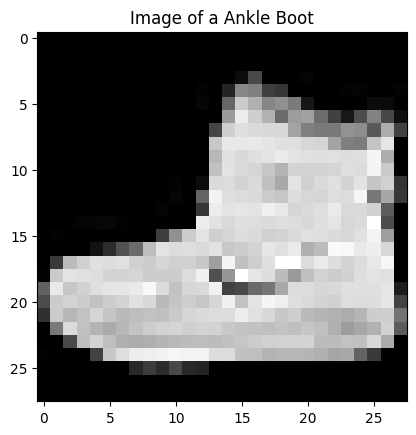

In [14]:
import matplotlib.pyplot as plt

# Visualize the first image in the training dataset
first_image = training_data[0][0].reshape((28, 28))
first_label = training_data[0][1]

# Use the plt.imshow function to plot an image
plt.imshow(first_image, cmap="gray")
plt.title("Image of a %s" % label_map[first_label])

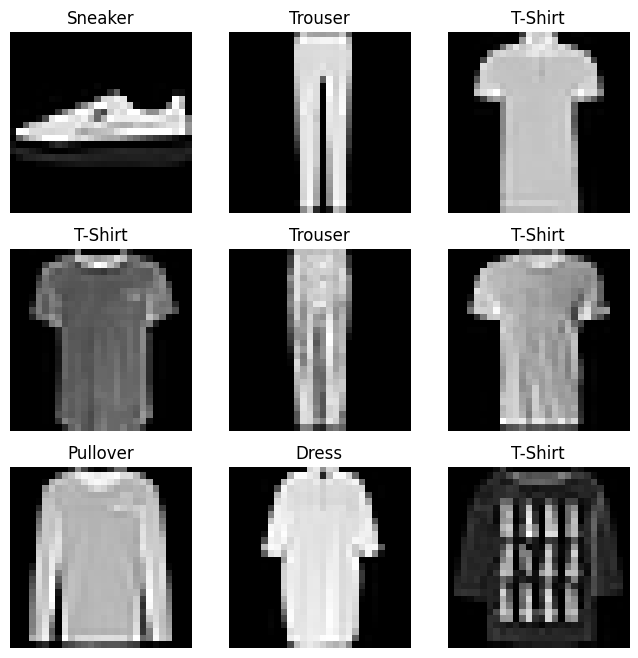

In [15]:
# Visualize multiple images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
16, i.e. each element in the dataloader iterable will return a batch of
16 features and labels.


In [16]:
batch_size = 16

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

print(f"Number of batches in the training set: {len(train_dataloader)}")
print(f"Number of batches in the test set: {len(test_dataloader)}")

for batched_x, batched_y in test_dataloader:
    # batched_x is one batch of images
    # N, C, H, W = batch_size, channel, height, width
    print(f"Shape of batched_x [N, C, H, W]: {batched_x.shape} {batched_x.dtype}")

    # batched_y is one batch of labels
    print(f"Shape of batched_y: {batched_y.shape} {batched_y.dtype}")
    break

Number of batches in the training set: 3750
Number of batches in the test set: 625
Shape of batched_x [N, C, H, W]: torch.Size([16, 1, 28, 28]) torch.float32
Shape of batched_y: torch.Size([16]) torch.int64


**TODO**: Try experimenting with different batch sizes and observe how it affects the number of batches and the dimensions of each batch of data


Read more about [data loaders in PyTorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

------------------------------------------------------------------------


Creating Models
===============




Let's create a neural network with 3 layers. The input to the neural network is a batch of 28x28 grayscale images. The output of the neural network is the log probability of each of the 10 classes. Let's examine how the tensor shape and values change as it is passed through the neural network.

In [17]:
# first, we need to flatten the input tensor from (64, 1, 28, 28) into (64, 784)
flatten_layer = nn.Flatten()
x = flatten_layer(batched_x)
print("Shape of x:", x.shape)

Shape of x: torch.Size([16, 784])


In [18]:
# next, let's pass the data through a linear layer with 784 input neurons and 512 output neurons
# a linear layer is also known as a fully-connected layer because the output neurons are fully
# connected to the input neurons
# the output should use ReLU as the non-linear activation function
linear_layer_1 = nn.Linear(784, 512)
x = linear_layer_1(x)
x = nn.ReLU()(x)
print("Shape of x:", x.shape)

Shape of x: torch.Size([16, 512])


In [19]:
# next, let's pass the data through a second linear layer with 512 input neurons and 512 output neurons
# the output should use ReLU as the non-linear activation function
linear_layer_2 = nn.Linear(512, 512)
x = linear_layer_2(x)
x = nn.ReLU()(x)
print("Shape of batched_x:", x.shape)

Shape of batched_x: torch.Size([16, 512])


In [20]:
# finally, let's pass the data through a linear layer with 512 input neurons and 10 output neurons
linear_layer_3 = nn.Linear(512, 10)
x = linear_layer_3(x)
print("Shape of x:", x.shape)

Shape of x: torch.Size([16, 10])


In [21]:
# the output probabilities can be calculated by applying the softmax function
x = nn.Softmax(dim=1)(x)
print("Shape of x:", x.shape)
print(x)

Shape of x: torch.Size([16, 10])
tensor([[0.1009, 0.0953, 0.0997, 0.1007, 0.0991, 0.1032, 0.1021, 0.0973, 0.0993,
         0.1025],
        [0.1048, 0.0891, 0.1001, 0.0983, 0.0949, 0.1035, 0.1053, 0.0968, 0.1076,
         0.0995],
        [0.1021, 0.0949, 0.0956, 0.0979, 0.0945, 0.1035, 0.1062, 0.0973, 0.1040,
         0.1039],
        [0.1018, 0.0973, 0.0961, 0.0994, 0.0952, 0.1029, 0.1034, 0.0976, 0.1024,
         0.1040],
        [0.0999, 0.0958, 0.0982, 0.0978, 0.0956, 0.1027, 0.1035, 0.0976, 0.1061,
         0.1028],
        [0.1019, 0.0954, 0.0953, 0.0989, 0.0951, 0.1022, 0.1052, 0.0984, 0.1047,
         0.1029],
        [0.1021, 0.0943, 0.0952, 0.1001, 0.0973, 0.1043, 0.1007, 0.0991, 0.1047,
         0.1023],
        [0.1037, 0.0929, 0.1001, 0.0982, 0.0950, 0.1020, 0.1029, 0.0977, 0.1045,
         0.1030],
        [0.1024, 0.0956, 0.0982, 0.0988, 0.0979, 0.1040, 0.1028, 0.0976, 0.0997,
         0.1030],
        [0.1023, 0.0943, 0.1002, 0.0995, 0.0975, 0.1054, 0.1012, 0.0962, 0.1

To define a neural network in PyTorch, we can also create a class that inherits
from [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the GPU if available.

In [22]:
# Use the cuda device for training.
device = "cuda"
print(f"Using {device} device")

# TODO: Define the neural network model as a class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


This model can then be called to directly apply all of the linear and non-linear operations on an input batch of data.

In [23]:
x = model(batched_x.to(device))
print("Shape of x:", x.shape)

Shape of x: torch.Size([16, 10])


Read more about [building neural networks in
PyTorch](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).


------------------------------------------------------------------------


Optimizing the Model Parameters
===============================

To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).


In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

The training process for a neural network proceeds in 2 passes: a forward pass and a backward pass

Data is passed to the neural network in batches: each batch consists of a set of images and labels.

During the forward pass, the image is passed to the input layer and processed through successive layers until the prediction is generated at the output layer. The prediction is compared to the ground truth labels and the cross entropy loss is calculated.

During the backward pass, backpropagation is performed to update the weights of the network to minize the loss function, using the technique of gradient descent.

This process is repeated over and over until the loss function reaches a minimum. As this point, the neural network is optimized to accurately predict the class labels from image data

In [25]:
# First, we will try to run the forward pass and backward pass using one batch of data

# Get a batch of training data from the dataloader
images, labels = next(iter(train_dataloader))
print('"images" is a tensor with shape:', images.shape)
print('"labels" is a tensor with shape:', labels.shape)

print('Target labels are:')
for i in range(len(labels)):
    print(labels[i], label_map[int(labels[i])])

"images" is a tensor with shape: torch.Size([16, 1, 28, 28])
"labels" is a tensor with shape: torch.Size([16])
Target labels are:
tensor(9) Ankle Boot
tensor(0) T-Shirt
tensor(0) T-Shirt
tensor(3) Dress
tensor(0) T-Shirt
tensor(2) Pullover
tensor(7) Sneaker
tensor(2) Pullover
tensor(5) Sandal
tensor(5) Sandal
tensor(0) T-Shirt
tensor(9) Ankle Boot
tensor(5) Sandal
tensor(5) Sandal
tensor(7) Sneaker
tensor(9) Ankle Boot


In [26]:
# put the model in training mode
model = model.train()

# move this batch of data to the GPU if device is cuda
images, labels = images.to(device), labels.to(device)

# Forward pass: process the input point clouds through the neural network and predict the output probabilities
prediction = model(images)

print('"prediction" is a tensor with shape:', prediction.shape)
print(prediction)

# the predicted label is the array index associated with the maximum probability for each training sample
predicted_labels = prediction.data.max(1)[1]
print(predicted_labels)
print('"predicted_labels" is a tensor with shape:', predicted_labels.shape)

print('Predicted labels are:')
for i in range(len(predicted_labels)):
    print(predicted_labels[i], label_map[int(predicted_labels[i])])

"prediction" is a tensor with shape: torch.Size([16, 10])
tensor([[ 2.3341e-02, -7.7251e-02, -5.0784e-02,  1.5239e-03,  1.6276e-02,
         -1.8523e-03, -3.4164e-02, -7.4258e-02,  1.2278e-02, -7.5278e-02],
        [ 7.2726e-02, -1.8465e-03, -3.1103e-02,  1.9703e-02,  9.6214e-02,
         -3.6180e-02, -3.6092e-03, -4.8624e-02, -7.1389e-03, -5.6244e-02],
        [ 2.7058e-02, -3.9603e-03, -2.6069e-02,  1.8040e-02,  9.3523e-03,
         -2.1268e-02, -1.8511e-02, -4.0423e-02, -1.8817e-02, -4.7234e-02],
        [ 2.6596e-02, -4.8226e-03, -3.7826e-02,  3.9734e-02,  2.8584e-02,
         -2.2958e-02, -3.1235e-02, -4.4826e-02, -2.3795e-02, -5.3241e-02],
        [ 9.5245e-03, -4.1616e-02, -9.4235e-02,  4.0441e-02,  6.6933e-02,
         -6.0473e-02, -2.9115e-03, -5.1593e-02, -5.9060e-02, -6.3699e-02],
        [ 2.1980e-02, -2.5507e-02, -7.2750e-02,  2.2275e-02,  2.4983e-02,
         -3.4434e-02, -4.4261e-02, -6.6444e-02, -1.3369e-02, -5.5924e-02],
        [ 6.8819e-02, -3.0211e-02, -4.0523e-02, 

In [27]:
# compare the prediction vs the target labels and determine the cross entropy loss
loss = loss_fn(prediction, labels)
print('Cross entropy loss is', loss)

Cross entropy loss is tensor(2.2967, device='cuda:0', grad_fn=<NllLossBackward0>)


In [28]:
# Backward pass: perform backpropagation to update the weights of the network based on the computed loss function
# PyTorch has a built-in differentiation engine called torch.autograd which will automatically compute gradients
loss.backward()
optimizer.step()

# Run the forward pass again: this time, the predictions should be closer to the target
# The network has 'learned' how to associate patterns in the point cloud with specific classes of objects
prediction = model(images)

print('"prediction" is a tensor with shape:', prediction.shape)
print(prediction)

predicted_labels = prediction.data.max(1)[1]
print(predicted_labels)
print('"predicted_labels" is a tensor with shape:', predicted_labels.shape)

print('predicted_labels labels are:')
for i in range(len(predicted_labels)):
    print(predicted_labels[i], label_map[int(predicted_labels[i])])


"prediction" is a tensor with shape: torch.Size([16, 10])
tensor([[ 0.0308, -0.0839, -0.0437, -0.0033,  0.0078,  0.0027, -0.0417, -0.0782,
          0.0064, -0.0607],
        [ 0.0906, -0.0096, -0.0231,  0.0154,  0.0863, -0.0337, -0.0103, -0.0529,
         -0.0130, -0.0476],
        [ 0.0351, -0.0071, -0.0231,  0.0162,  0.0042, -0.0191, -0.0223, -0.0421,
         -0.0217, -0.0429],
        [ 0.0369, -0.0094, -0.0334,  0.0386,  0.0222, -0.0212, -0.0365, -0.0471,
         -0.0274, -0.0479],
        [ 0.0264, -0.0472, -0.0888,  0.0370,  0.0578, -0.0579, -0.0090, -0.0552,
         -0.0648, -0.0566],
        [ 0.0336, -0.0332, -0.0603,  0.0166,  0.0153, -0.0323, -0.0519, -0.0708,
         -0.0190, -0.0460],
        [ 0.0731, -0.0345, -0.0380, -0.0338, -0.0202, -0.0115, -0.0528, -0.0335,
         -0.0082, -0.0331],
        [ 0.0425, -0.0667, -0.0882,  0.0162,  0.0492, -0.0447, -0.1033, -0.1372,
         -0.0285, -0.0038],
        [ 0.0337, -0.0063, -0.0063,  0.0071, -0.0135, -0.0061, -0.0104

In [29]:
# compare the prediction vs the target labels and determine the negative log-likelihood loss
loss = loss_fn(prediction, labels)
print('Cross entropy loss is', loss)

Cross entropy loss is tensor(2.2869, device='cuda:0', grad_fn=<NllLossBackward0>)


Running a single iteration is usually not sufficient to train the network. We can repeat this process by running the forward and backward passes within a training loop. In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model\'s parameters.


In [30]:
# TODO: Define the training loop
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):

        X, y = X.to(device), y.to(device)

        # Compute prediction error and perform backpropagation
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model\'s performance against the test dataset to
ensure it is learning.


In [31]:
# TODO: Define the testing loop
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)

            # Compute prediction and calculate the accuracy
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.


In [32]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.286905  [   16/60000]
loss: 1.800302  [ 1616/60000]
loss: 1.226537  [ 3216/60000]
loss: 0.966566  [ 4816/60000]
loss: 0.770972  [ 6416/60000]
loss: 0.853909  [ 8016/60000]
loss: 0.908042  [ 9616/60000]
loss: 0.446199  [11216/60000]
loss: 0.598609  [12816/60000]
loss: 0.419086  [14416/60000]
loss: 1.036128  [16016/60000]
loss: 0.412211  [17616/60000]
loss: 0.433080  [19216/60000]
loss: 1.244072  [20816/60000]
loss: 0.576808  [22416/60000]
loss: 0.699102  [24016/60000]
loss: 0.429694  [25616/60000]
loss: 0.702452  [27216/60000]
loss: 0.583565  [28816/60000]
loss: 0.383689  [30416/60000]
loss: 0.561872  [32016/60000]
loss: 0.357208  [33616/60000]
loss: 0.289005  [35216/60000]
loss: 0.372330  [36816/60000]
loss: 0.589019  [38416/60000]
loss: 0.610973  [40016/60000]
loss: 0.601287  [41616/60000]
loss: 0.512068  [43216/60000]
loss: 0.566877  [44816/60000]
loss: 0.477888  [46416/60000]
loss: 0.363007  [48016/60000]
loss: 0.436154  [49616/60000]


Read more about [Training your model](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html).


------------------------------------------------------------------------


Saving Models
=============

A common way to save a model is to serialize the internal state
dictionary (containing the model parameters).


In [33]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Loading Models
==============

The process for loading a model includes re-creating the model structure
and loading the state dictionary into it.


In [34]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

This model can now be used to make predictions.


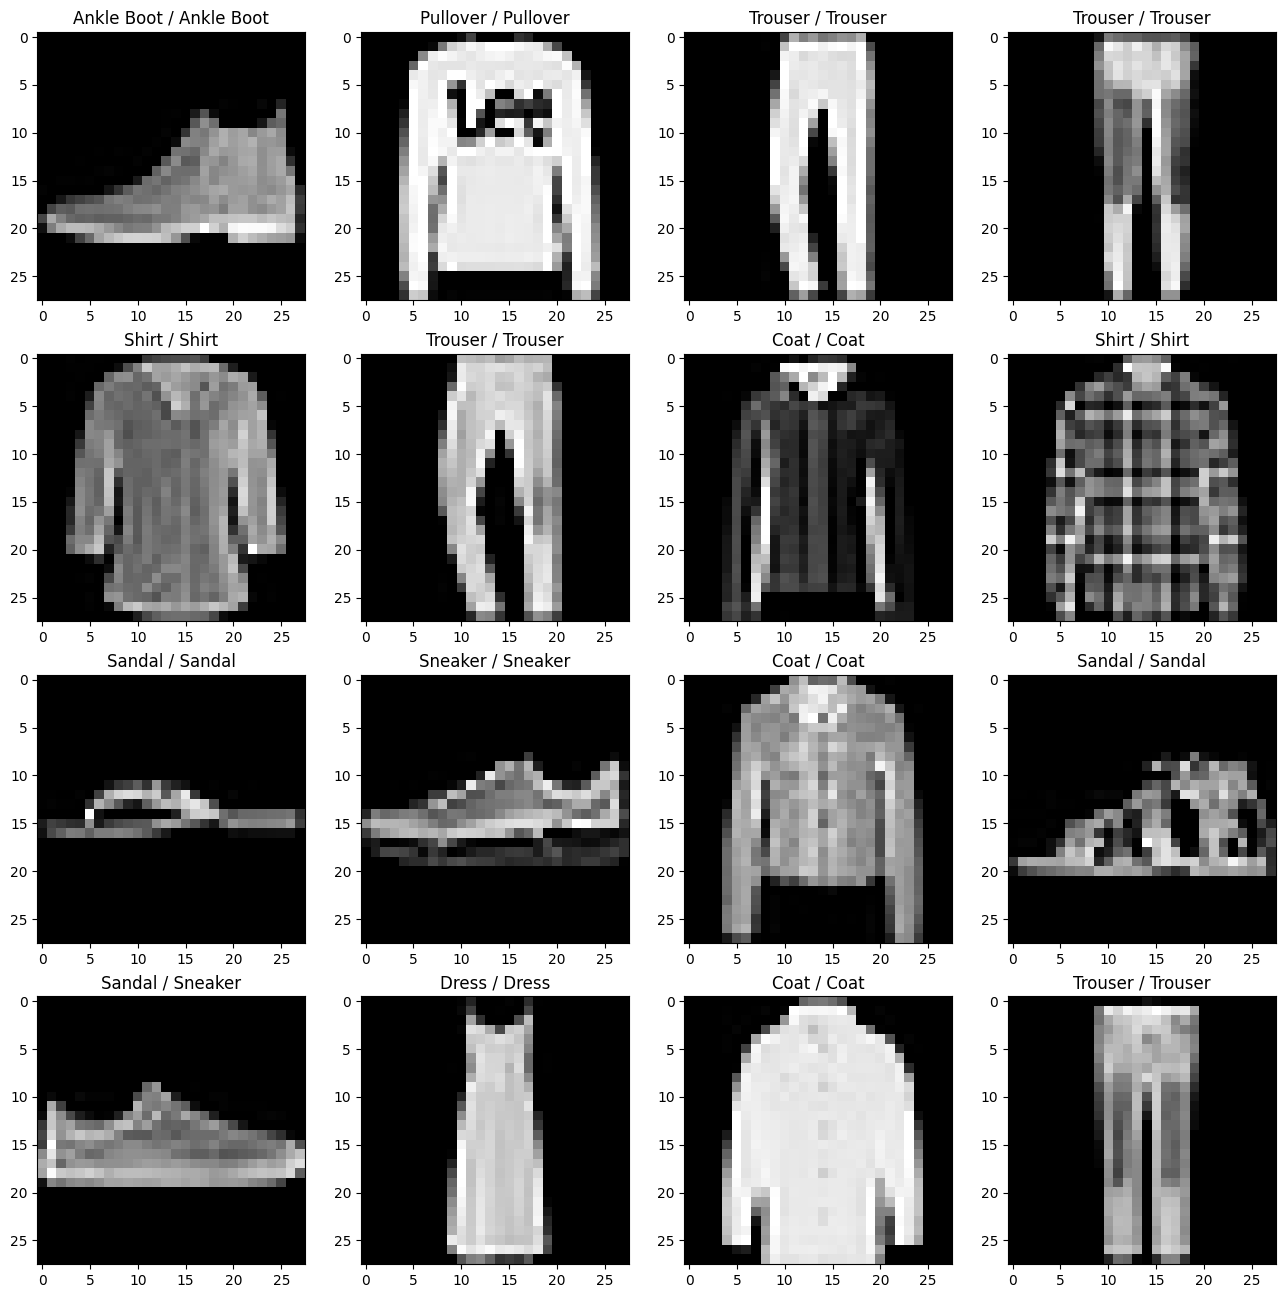

In [35]:
model.eval()

# Visualize a few test samples along with their predicted classes
plt.figure(figsize=(16,16))
test_images, test_labels = next(iter(test_dataloader))
test_predictions = model(test_images.to(device))
predicted_labels = test_predictions.max(1)[1]

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), cmap="gray")
    plt.title("%s / %s" % (label_map[int(predicted_labels[i])], label_map[int(test_labels[i])]))

Read more about [Saving & Loading your
model](https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html).


Convolutional Neural Networks
---

For image data, convolutional layers usually help to extract better features compared to linear layers. Let's try implementing a convolutional neural network in PyTorch and compare its performance to the neural network with only fully connected layers

In [36]:
# Get cpu, gpu or mps device for training.
device = "cuda"
print(f"Using {device} device")

import torch.nn as nn
import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [38]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.273341  [   16/60000]
loss: 2.269574  [ 1616/60000]
loss: 1.705978  [ 3216/60000]
loss: 1.187400  [ 4816/60000]
loss: 0.943996  [ 6416/60000]
loss: 1.473776  [ 8016/60000]
loss: 1.230680  [ 9616/60000]
loss: 0.602178  [11216/60000]
loss: 0.811125  [12816/60000]
loss: 0.463779  [14416/60000]
loss: 0.915478  [16016/60000]
loss: 0.784552  [17616/60000]
loss: 0.682925  [19216/60000]
loss: 1.395565  [20816/60000]
loss: 0.891601  [22416/60000]
loss: 0.769411  [24016/60000]
loss: 0.856242  [25616/60000]
loss: 0.944960  [27216/60000]
loss: 1.067055  [28816/60000]
loss: 0.649668  [30416/60000]
loss: 0.926298  [32016/60000]
loss: 0.505265  [33616/60000]
loss: 0.446837  [35216/60000]
loss: 0.554246  [36816/60000]
loss: 0.713525  [38416/60000]
loss: 0.616527  [40016/60000]
loss: 0.727377  [41616/60000]
loss: 0.706571  [43216/60000]
loss: 0.658041  [44816/60000]
loss: 0.651247  [46416/60000]
loss: 0.412288  [48016/60000]
loss: 0.383850  [49616/60000]


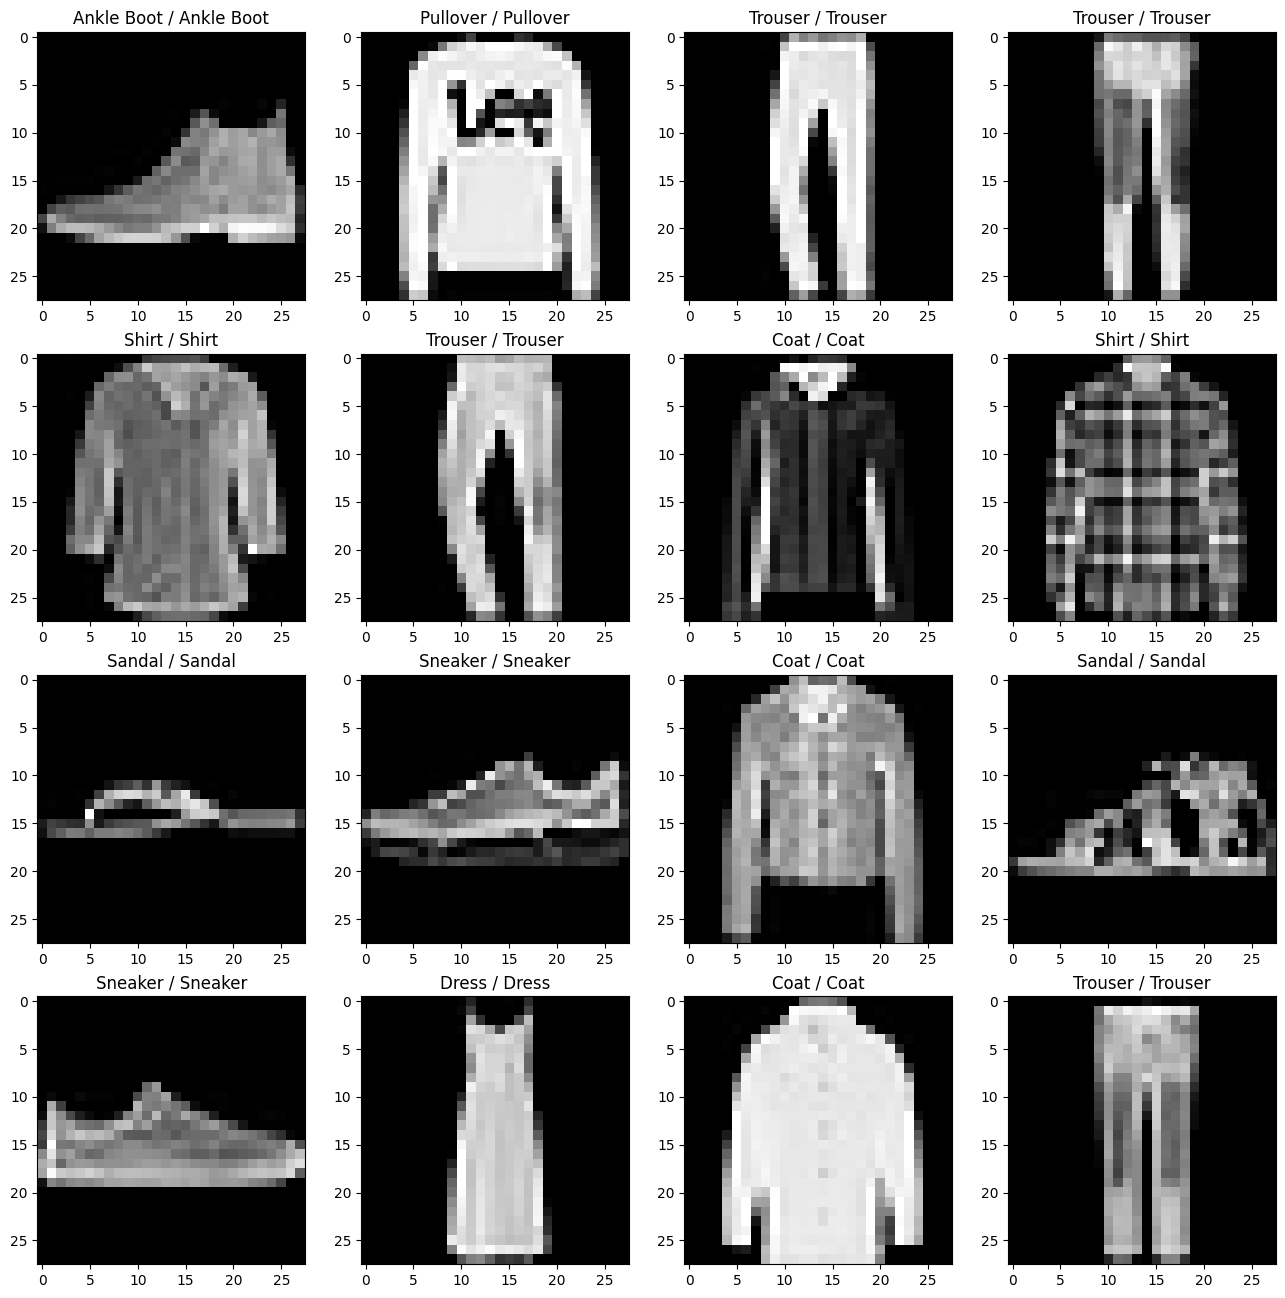

In [39]:
model.eval()

# Visualize a few test samples along with their predicted classes
plt.figure(figsize=(16,16))
test_images, test_labels = next(iter(test_dataloader))
test_predictions = model(test_images.to(device))
predicted_labels = test_predictions.max(1)[1]

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), cmap="gray")
    plt.title("%s / %s" % (label_map[int(predicted_labels[i])], label_map[int(test_labels[i])]))